In [26]:
import numpy as np # linear algebra
import pandas as pd

In [39]:
data = "Project_dataset.csv"
df=pd.read_csv(data)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,age,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,67,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,71,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,56,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,74,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,64,0.0,0


In [28]:
print(len(df))

1048575


In [4]:
df.shape
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

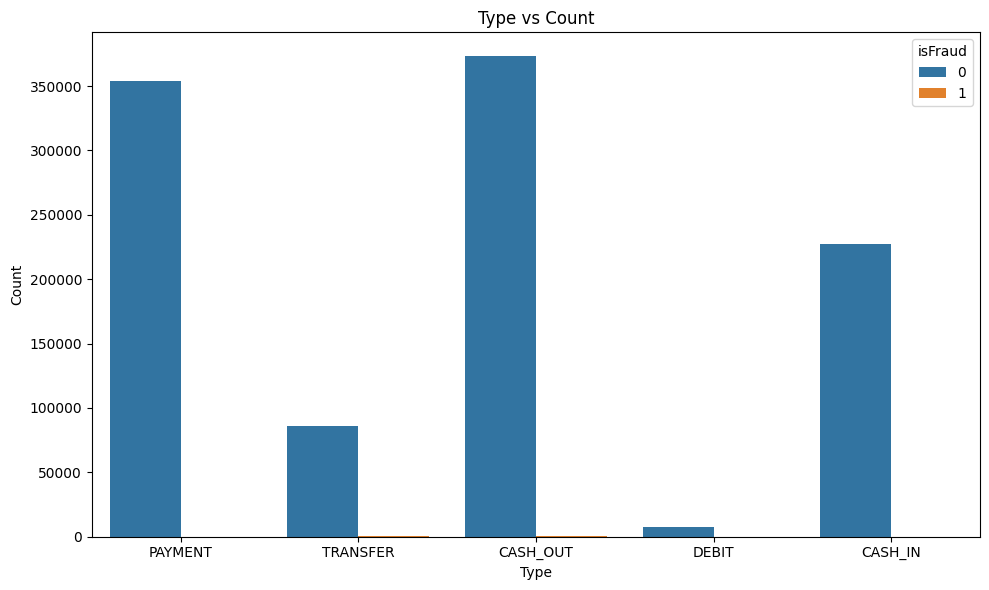

In [30]:
plt.figure(figsize=(10, 6))
plt.title("Type vs Count")
sns.countplot(data=df,x="type",hue="isFraud")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

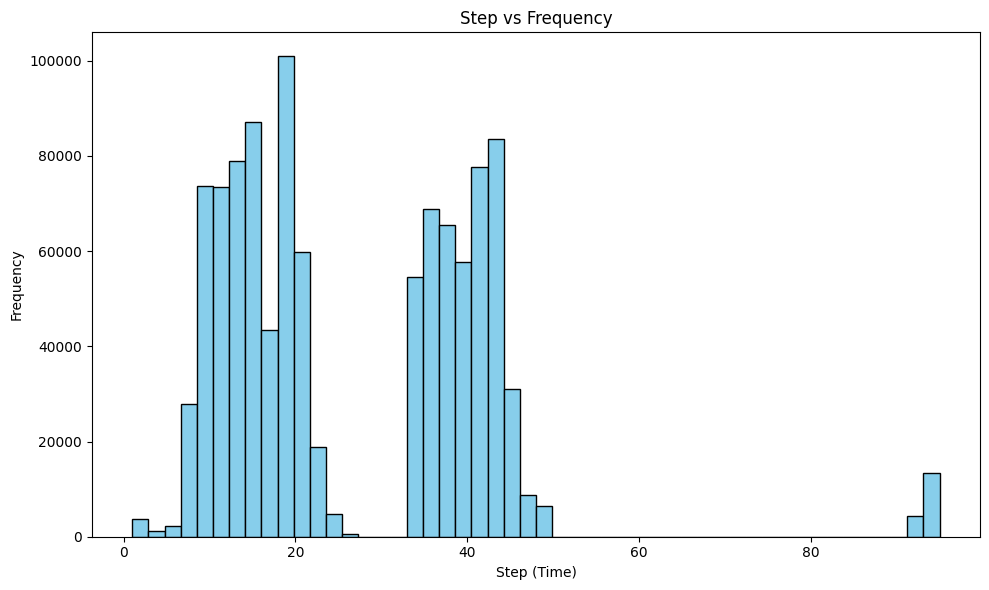

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['step'],bins=50,color='skyblue',edgecolor='black')
plt.title("Step vs Frequency")
plt.xlabel("Step (Time)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [40]:
X=df.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
X=X.iloc[:,:10]

In [41]:
Y=df.iloc[:,10]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from deap import base, creator, tools, algorithms
import random
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", lambda: random.choice([0, 1]))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    selected_features = [feature for feature, selected in zip(X.columns, individual) if selected]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    
    population_size = 10
    generations = 5
    population = toolbox.population(n=population_size)

    
    algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=2, cxpb=0.7, mutpb=0.2, ngen=generations, stats=None, halloffame=None, verbose=True)

    best_ind = tools.selBest(population, 1)[0]
    selected_features = [feature for feature, selected in zip(X.columns, best_ind) if selected]

    print("Best Individual:", selected_features)

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9945


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = ['amount', 'oldbalanceOrg']

X = df[selected_features]
y = df['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9989271153708604
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.49      0.15      0.23       224

    accuracy                           1.00    209715
   macro avg       0.75      0.57      0.61    209715
weighted avg       1.00      1.00      1.00    209715



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = ['amount', 'oldbalanceOrg']
X=X_test[selected_features]
a=gb_classifier.predict(X)

In [48]:
f=0
t=0
for i in a:
    if i==0:
        f+=1
    else:
        t+=1
print(f"number of fraud:{t}")
print(f"number of real:{f}")

number of fraud:67
number of real:209648


In [50]:
print(len(X_test))

209715
